#Function and Models

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
!python /content/drive/MyDrive/child-level-data.py

         Domain        area  ... child_values_2.1                                             fields
0  biochemistry    Genetics  ...               5%  ['Statistical Genetics', 'Genetic Epidemiology...
1  biochemistry    Genetics  ...               3%                           ['pancreas and biliary']
2       Medical      Cancer  ...              14%                                         ['cancer']
3  biochemistry  Enzymology  ...              18%  ['Physical Chemistry', 'Theoretical Chemistry'...
4       Medical    Medicare  ...              15%  ['Circadian Rhythms in Heart Ischemia and Acut...

[5 rows x 15 columns]
biochemistry
Medical
ECE
Psychology
Civil
MAE
CS


In [121]:
import numpy as np
import pandas as pd
import string
import os

number=6
areas=["CS","Civil","ECE","MAE","Medical","Psychology","biochemistry"]

#Make Directory For Child-Level
if os.path.exists(f'/content/drive/MyDrive/Science Survey/{areas[number]}') == False:
  os.mkdir(f'/content/drive/MyDrive/Science Survey/{areas[number]}')


data=pd.read_csv(f"/content/{areas[number]}.csv")
data.head() #show the head of the dataset

,index,fields,Domain
0,0,"['Statistical Genetics', 'Genetic Epidemiology...",Genetics
1,1,['pancreas and biliary'],Genetics
2,3,"['Physical Chemistry', 'Theoretical Chemistry'...",Enzymology
3,5,"['Cancer Systems Biology', 'Functional Genomic...",Molecular biology
4,6,['Herpes viruses'],Immunology


In [122]:
pip install keras-tuner --upgrade

In [123]:
#SKLEARN LINRARIES
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split,KFold

#NLTK LIBRARIES
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize,RegexpTokenizer
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words=stopwords.words("english")
from nltk.stem import PorterStemmer

from bs4 import BeautifulSoup
from IPython.display import clear_output
import numpy as np
import pandas as pd
import string
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from collections import Counter

#Tokenizing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def Progress(string):
    global iterator
    global number_of_records
    percent=((iterator/number_of_records)*10)

    if percent%5==0:
        clear_output(wait=True)
        print(string+":"+str(percent)+"%")

    iterator=iterator+1

def remove_strip(text):
    return text.strip()

def remove_noise(text):


    soup=BeautifulSoup(text,"html.parser")
    text=soup.get_text()
    return text

def remove_punc(text):


    rem_punc=RegexpTokenizer(r'\w+')
    return ' '.join(rem_punc.tokenize(text))

def remove_stopwords(text):


    words=word_tokenize(text)
    return ' '.join([w.lower() for w in words if not w.lower() in stop_words])

def stemming(text):


    words=word_tokenize(text)
    porter=PorterStemmer()
    return ' '.join([porter.stem(w) for w in words ])



def Vocab(text):
  global freqdist
  words=word_tokenize(text)
  vocab.update(nltk.FreqDist(words).keys())

def build_vocab(documents):

  #maing vocab
  documents.apply(Vocab)

  return vocab

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [124]:
# define the model
import keras
from keras.models import Sequential
from keras.models import Model
import numpy as np
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional,SimpleRNN
from keras.optimizers import Adam,RMSprop
import keras_tuner as kt
import tensorflow as tf
from keras.metrics import Accuracy,Precision,Recall,F1Score

# define the model
class CNN(kt.HyperModel):
  def __init__(self,wv,complexity,max_length,nClasses):
    self.wv=wv
    self.complexity=complexity
    self.max_length=max_length
    self.nClasses=nClasses

  def build(self,hp):
    model=Sequential()
    model.add(Embedding(input_dim=(self.wv.shape[0]),
                            output_dim=(self.wv.shape[1]),
                            weights=[self.wv],
                            input_length=self.max_length,
                            trainable=False))
    if self.complexity==0:

      for j in range(0,hp.Int("Testing number of Conv and maxpolling layer", min_value=1, max_value=1, step=1)):
        model.add(Conv1D(256,hp.Choice("Testing the kernel size of conv",[3,5]), activation='relu'))
        model.add(MaxPooling1D(5))

        model.add(Flatten())
      for j in range(0,hp.Int("Testing number of Desnse Layer", min_value=1, max_value=1, step=1)):
        model.add(Dense(hp.Int("Testing number of nuerons Desnse Layer", min_value=32, max_value=256, step=32), activation='relu'))
      model.add(Dense(self.nClasses, activation='softmax'))

        # for j in range(0,2):
        #   model.add(Conv1D(256,3, activation='relu'))
        #   model.add(MaxPooling1D(3))

        # model.add(Flatten())
        # for j in range(0,3):
        #   model.add(Dense(100))
        # model.add(Dense(self.nClasses, activation='softmax'))
    else:

        filter_sizes = [3, 4, 5, 6, 7]
        for fsz in filter_sizes:
            model.add(Conv1D(128,fsz,activation='relu'))
            model.add(MaxPooling1D(5))

        model.add(Conv1D(128,5, activation='relu'))
        model.add(MaxPooling1D(5))
        model.add(Conv1D(128,5, activation='relu'))
        model.add(MaxPooling1D(30))

        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(self.nClasses, activation='softmax'))

    model.compile(optimizer=RMSprop(learning_rate=0.001),loss=["categorical_crossentropy"],metrics=["accuracy",Precision(name="precision"),Recall(name="recall")])
    return model

class RNN():
  def __init__(self,wv,complexity,max_length,nClasses):
    self.wv=wv
    self.complexity=complexity
    self.max_length=max_length
    self.nClasses=nClasses

  def build(self):
    model = Sequential()
    model.add(Embedding(input_dim=(self.wv.shape[0]),
                        output_dim=(self.wv.shape[1]),
                        weights=[self.wv],
                        input_length=self.max_length,
                        trainable=False))

    model.add(GRU(100))
    model.add(Dense(self.nClasses, activation='softmax'))
    model.compile(optimizer=RMSprop(learning_rate=0.001),loss=["categorical_crossentropy"],metrics=["accuracy",Precision(name="precision"),Recall(name="recall")])
    return model



class DNN(kt.HyperModel):
  def __init__(self,Shape,nClasses,nLayers=3,Number_Node=100, dropout=0.5):
    self.Shape=Shape
    self.nLayers=nLayers
    self.Number_Node=Number_Node
    self.nClasses=nClasses
    self.dropout=dropout

  def build(self,hp):
    model = Sequential()
    model.add(Dense(hp.Int("Testing number of nuerons Desnse Layer", min_value=100, max_value=400, step=100), input_shape=(self.Shape,)))
    model.add(Dropout(self.dropout))

    for i in range(0,hp.Int("Testing number of Desnse Layer", min_value=1, max_value=3, step=1)):
        model.add(Dense(hp.Int("Testing number of nuerons Desnse Layer", min_value=100, max_value=400, step=100), activation='relu'))
        model.add(Dropout(self.dropout))

    model.add(Dense(self.nClasses, activation='softmax'))
    model.compile(loss='categorical_crossentropy',metrics=["accuracy",Precision(name="precision"),Recall(name="recall")],optimizer='adam')
    return model
    return model

In [125]:
data.tail() #show the end of the dataset

,index,fields,Domain
29946,85268,['Genetics and Biotechnology'],Genetics
29947,85269,"['Organic chemistry', 'Biochemisty', 'Natural ...",Enzymology
29948,85272,['Plant breeding'],Immunology
29949,85274,['Fiziologija čovjeka'],Immunology
29950,85282,"['Genetic engineering', 'Biotehnology', 'Plant...",Genetics


In [126]:
data.columns

Index(['index', 'fields', 'Domain'], dtype='object')

In [127]:
data.shape

(29951, 3)

In [128]:
data.describe()

,index
count,29951.000000
mean,44760.130814
std,23730.121556
min,0.000000
25%,25067.000000
50%,46209.000000
75%,65068.500000
max,85282.000000


In [129]:
data.isnull().any() #checking the dataset have null values

index     False
fields    False
Domain    False
dtype: bool

In [130]:
data.isnull().sum() #checking number of null values

index     0
fields    0
Domain    0
dtype: int64

In [131]:
data['Domain'].value_counts() # check the vlaues for each columns

Immunology                   16010
Molecular biology             4525
Enzymology                    3818
Genetics                      3716
Cell biology                  1256
Human Metabolism               518
Polymerase chain reaction       76
Southern blotting               27
Northern blotting                5
Name: Domain, dtype: int64

In [132]:
# data=data.loc[:,["Abstract","Domain"]]
# data

#Preprocessing


In [133]:
#before preprocessing
print("------------------------------------------------")
print(data["fields"][0])
print("------------------------------------------------")

#removeing puctuation
iterator=1
data['fields']=data['fields'].apply(remove_punc)

#removeing stopwords
iterator=1
data['fields']=data['fields'].apply(remove_stopwords)

#after preprocessing
print("------------------------------------------------")
print(data["fields"][0])
print("------------------------------------------------")

------------------------------------------------
['Statistical Genetics', 'Genetic Epidemiology', 'Genetics of Gene Expression', 'Variance Components Methods in Genetics', 'Multivariate L']
------------------------------------------------
------------------------------------------------
statistical genetics genetic epidemiology genetics gene expression variance components methods genetics multivariate l
------------------------------------------------


#Tokenizer

In [134]:
# #number of distince frequency in dataset
# print('--------------------------------------------------------------------------------------------------------')
# vocab=Counter()
# freqdist=len(build_vocab(data["fields"]))
# print("Number Frequency "+str(freqdist))
# print('--------------------------------------------------------------------------------------------------------')

# # Tokenize our training data
# print('--------------------------------------------------------------------------------------------------------')
# print("Tokenizing...")
# tokenizer = Tokenizer(freqdist-200)
# tokenizer.fit_on_texts(data['fields'])
# # Encode training data sentences into sequences
# sequences = tokenizer.texts_to_sequences(data['fields'],)

# # Get our training data word index
# word_to_index = tokenizer.word_index

# # Get max training sequence length
# maxlen = max([len(x) for x in sequences])

# #Pad the training sequences
# sequences_padded = pad_sequences(sequences,maxlen=maxlen)

# # Output the results of our work
# print("Word index:\n",len(word_to_index))
# print("\nSequences:", sequences[0])
# print("\nSequences Length:", len(sequences[0]))
# print("\nPadded Sequences:", sequences_padded[0])
# print("\nPadded Sequences Length:", len(sequences_padded[0]))
# print('--------------------------------------------------------------------------------------------------------')

In [135]:
sequences_padded=np.loadtxt('/content/drive/MyDrive/sequences_padded_science_survey.txt',dtype='int32')

#Word_Embedding

In [136]:
# from gensim.models import KeyedVectors

# words_embeddings={}

# #GloVe 50d
# words_embeddings["glove.50d"]=KeyedVectors.load_word2vec_format("/content/drive/MyDrive/glove.50d.txt",binary=False)
# # GloVe 100d
# words_embeddings["glove.100d"]=KeyedVectors.load_word2vec_format("/content/drive/MyDrive/glove.100d.txt",binary=False)
# #GloVe 200d
# words_embeddings["glove.200d"]=KeyedVectors.load_word2vec_format("/content/drive/MyDrive/glove.200d.txt",binary=False)
# #GloVe 300d
# words_embeddings["glove.300d"]=KeyedVectors.load_word2vec_format("/content/drive/MyDrive/glove.300d.txt",binary=False)
# #GoogleNews-vectors
# words_embeddings["GoogleNews-vectors"]=KeyedVectors.load_word2vec_format("/content/drive/MyDrive/GoogleNews-vectors-negative300.bin",binary=True)

In [137]:
# words_embeddings_matrix={}
# for key,wv in words_embeddings.items():
#   vocab=len(word_to_index)
#   vocab_word_embedding=wv.key_to_index.keys()

#   emb_matrix=np.zeros((vocab,len(wv.get_vector("computer"))))
#   # emb_matrix=np.random.random((vocab,len(wv.get_vector("computer"))))
#   emb_dict={}
#   not_existing_words=[]

#   for word,index in word_to_index.items():
#     if word in vocab_word_embedding:
#       if index==len(word_to_index.keys()):
#         continue
#       emb_dict[word]=wv.get_vector(word)
#       emb_matrix[index, :]=wv.get_vector(word)
#     else:
#       not_existing_words.append(word)

#   words_embeddings_matrix[key]=emb_matrix
#   print("Not Existing Word:",not_existing_words[1])
#   print("\n\nNumber Of Not Existing Word:",len(not_existing_words))
#   print("\n\nVector Of Existing Word good:",emb_dict["good"])
#   print("\n\nEmbeding Matrix shape",emb_matrix.shape)



#   del not_existing_words
#   del emb_dict
#   del emb_matrix


In [138]:
# words_embeddings["FastText"]=np.loadtxt("/content/drive/MyDrive/fasttext.txt")

In [139]:
words_embeddings_matrix={}
# keys=['glove.50d', 'glove.100d', 'glove.200d', 'glove.300d', 'GoogleNews-vectors', 'FastText']
keys=['GoogleNews-vectors']
for key in keys:
  words_embeddings_matrix[key]=np.loadtxt(f'/content/drive/MyDrive/words_embeddings_matrix_science_survey/{key}_matrix.txt')

#Model

In [140]:
from sklearn.preprocessing import LabelBinarizer

label=LabelBinarizer()
data_multi_class=label.fit_transform(data["Domain"])
print(data_multi_class.shape)

(29951, 9)


In [141]:
temp=[]
for index in data["index"]:
  temp.append(sequences_padded[index])
sequences_padded=np.array(temp)
sequences_padded.shape

(29951, 33)

In [142]:
Excel_Output=pd.DataFrame(columns=["Classifier","Embedding","Dimension_Size"])

#RNN MODEL

Epoch 1/8
351/351 [==============================] - 5s 8ms/step - loss: 0.6878 - accuracy: 0.7844 - precision: 0.8541 - recall: 0.6967 - val_loss: 0.4906 - val_accuracy: 0.8383 - val_precision: 0.8809 - val_recall: 0.7998
Epoch 2/8
351/351 [==============================] - 2s 6ms/step - loss: 0.4659 - accuracy: 0.8414 - precision: 0.8817 - recall: 0.8075 - val_loss: 0.4674 - val_accuracy: 0.8429 - val_precision: 0.8682 - val_recall: 0.8235
Epoch 3/8
351/351 [==============================] - 2s 6ms/step - loss: 0.4065 - accuracy: 0.8591 - precision: 0.8957 - recall: 0.8282 - val_loss: 0.4436 - val_accuracy: 0.8528 - val_precision: 0.8955 - val_recall: 0.8156
Epoch 4/8
351/351 [==============================] - 3s 7ms/step - loss: 0.3682 - accuracy: 0.8734 - precision: 0.9046 - recall: 0.8435 - val_loss: 0.3878 - val_accuracy: 0.8697 - val_precision: 0.9005 - val_recall: 0.8488
Epoch 5/8
351/351 [==============================] - 2s 7ms/step - loss: 0.3389 - accuracy: 0.8833 - precisi

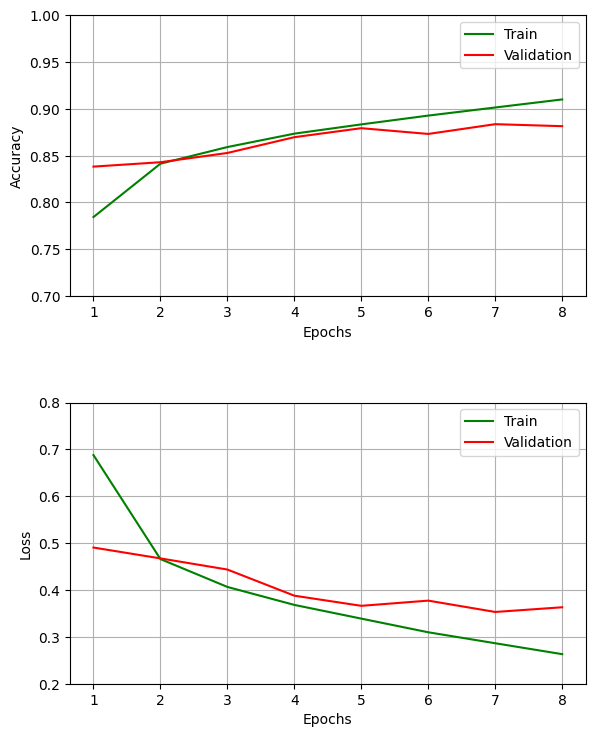

Epoch 1/8
351/351 [==============================] - 5s 7ms/step - loss: 0.6951 - accuracy: 0.7799 - precision: 0.8545 - recall: 0.6933 - val_loss: 0.4840 - val_accuracy: 0.8385 - val_precision: 0.8810 - val_recall: 0.8076
Epoch 2/8
351/351 [==============================] - 3s 7ms/step - loss: 0.4725 - accuracy: 0.8413 - precision: 0.8817 - recall: 0.8064 - val_loss: 0.4325 - val_accuracy: 0.8531 - val_precision: 0.8933 - val_recall: 0.8240
Epoch 3/8
351/351 [==============================] - 2s 7ms/step - loss: 0.4150 - accuracy: 0.8613 - precision: 0.8960 - recall: 0.8293 - val_loss: 0.3887 - val_accuracy: 0.8719 - val_precision: 0.9009 - val_recall: 0.8405
Epoch 4/8
351/351 [==============================] - 2s 6ms/step - loss: 0.3767 - accuracy: 0.8722 - precision: 0.9040 - recall: 0.8444 - val_loss: 0.3999 - val_accuracy: 0.8646 - val_precision: 0.8861 - val_recall: 0.8438
Epoch 5/8
351/351 [==============================] - 3s 8ms/step - loss: 0.3453 - accuracy: 0.8811 - precisi

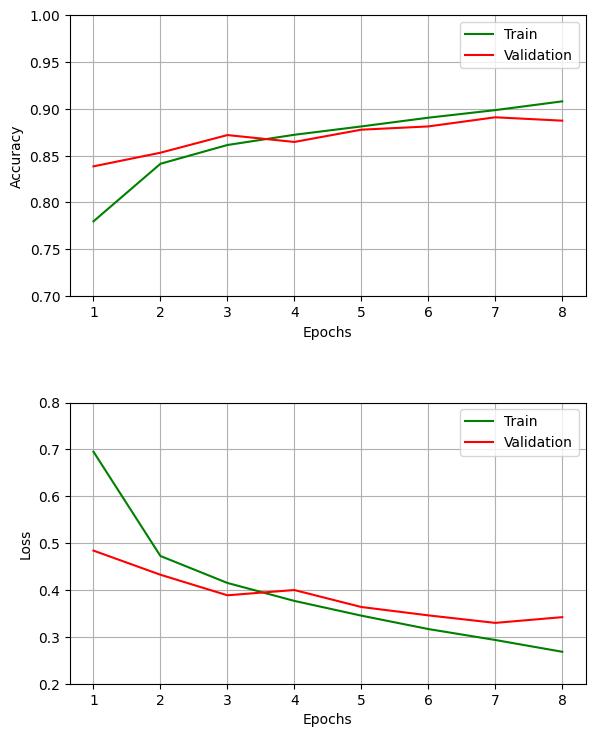

Epoch 1/8
351/351 [==============================] - 8s 11ms/step - loss: 0.6784 - accuracy: 0.7847 - precision: 0.8596 - recall: 0.7028 - val_loss: 0.5144 - val_accuracy: 0.8313 - val_precision: 0.8748 - val_recall: 0.7895
Epoch 2/8
351/351 [==============================] - 2s 6ms/step - loss: 0.4598 - accuracy: 0.8460 - precision: 0.8859 - recall: 0.8118 - val_loss: 0.4905 - val_accuracy: 0.8319 - val_precision: 0.8620 - val_recall: 0.8066
Epoch 3/8
351/351 [==============================] - 2s 6ms/step - loss: 0.4002 - accuracy: 0.8659 - precision: 0.9002 - recall: 0.8360 - val_loss: 0.4192 - val_accuracy: 0.8582 - val_precision: 0.8931 - val_recall: 0.8259
Epoch 4/8
351/351 [==============================] - 2s 6ms/step - loss: 0.3620 - accuracy: 0.8766 - precision: 0.9095 - recall: 0.8490 - val_loss: 0.4101 - val_accuracy: 0.8590 - val_precision: 0.8844 - val_recall: 0.8357
Epoch 5/8
351/351 [==============================] - 2s 6ms/step - loss: 0.3307 - accuracy: 0.8882 - precis

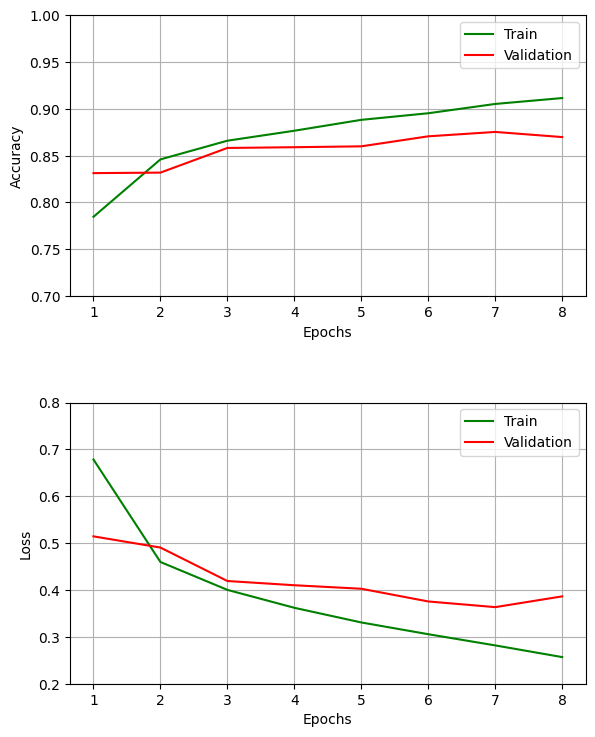

Epoch 1/8
351/351 [==============================] - 4s 8ms/step - loss: 0.6789 - accuracy: 0.7831 - precision: 0.8562 - recall: 0.6983 - val_loss: 0.5337 - val_accuracy: 0.8252 - val_precision: 0.8679 - val_recall: 0.7926
Epoch 2/8
351/351 [==============================] - 3s 8ms/step - loss: 0.4593 - accuracy: 0.8460 - precision: 0.8840 - recall: 0.8131 - val_loss: 0.4664 - val_accuracy: 0.8415 - val_precision: 0.8767 - val_recall: 0.8123
Epoch 3/8
351/351 [==============================] - 2s 6ms/step - loss: 0.4016 - accuracy: 0.8640 - precision: 0.8989 - recall: 0.8346 - val_loss: 0.4423 - val_accuracy: 0.8513 - val_precision: 0.8841 - val_recall: 0.8232
Epoch 4/8
351/351 [==============================] - 2s 6ms/step - loss: 0.3616 - accuracy: 0.8783 - precision: 0.9078 - recall: 0.8505 - val_loss: 0.4141 - val_accuracy: 0.8611 - val_precision: 0.8948 - val_recall: 0.8336
Epoch 5/8
351/351 [==============================] - 2s 6ms/step - loss: 0.3311 - accuracy: 0.8875 - precisi

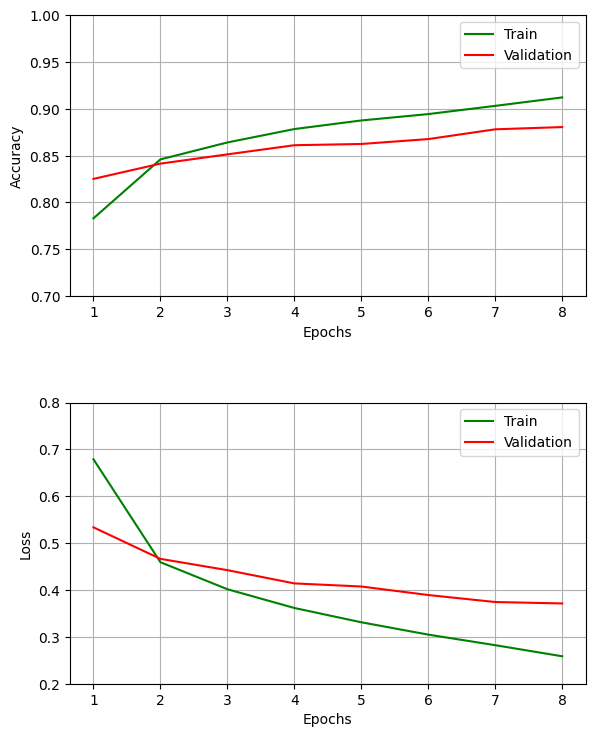

In [80]:
from sklearn.model_selection import KFold

for key,wv in words_embeddings_matrix.items():
  best_model=None
  best_accuracy=0
  overwrite=True
  #Using KFOLD
  kfold=KFold(n_splits=4,shuffle=True)
  fold=1
  for train,test in kfold.split(sequences_padded,data_multi_class):
    #KFOLD
    #------------------------------------------------------------------------------------------
    x_train=sequences_padded[train]
    x_test=sequences_padded[test]
    y_train=data_multi_class[train]
    y_test=data_multi_class[test]
    #------------------------------------------------------------------------------------------

    #RNN MODEL
    #-------------------------------------------------------------------------------
    rnn=RNN(wv,0,max_length=len(x_train[0]),nClasses=y_train.shape[1])
    model=rnn.build()
    history=model.fit(x_train, y_train,batch_size=64,epochs=8,validation_data=(x_test,y_test))
    #-------------------------------------------------------------------------------


    #PLOTING
    #------------------------------------------------------------------------------------------
    epochs_number=len(history.history["accuracy"])+1
    fig,axis=plt.subplots(2,1)

    #Figure Accuracy
    axis[0].plot(range(1,epochs_number),history.history["accuracy"],label="Train",color="green")
    axis[0].plot(range(1,epochs_number),history.history["val_accuracy"],label="Validation",color="red")
    axis[0].set_xlabel('Epochs')
    axis[0].set_ylabel('Accuracy')
    axis[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axis[0].yaxis.set_ticks(np.arange(round(min(history.history["accuracy"])-0.05,1),round(max(history.history["accuracy"])+0.05,1),0.05))
    #Figure Loss
    axis[1].plot(range(1,epochs_number),history.history["loss"],label="Train",color="green")
    axis[1].plot(range(1,epochs_number),history.history["val_loss"],label="Validation",color="red")
    axis[1].set_xlabel('Epochs')
    axis[1].set_ylabel('Loss')
    axis[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis[1].yaxis.set_ticks(np.arange(round(min(history.history["loss"])-0.1,1),round(max(history.history["loss"])+0.1,1),0.1))

    axis[0].grid()
    axis[1].grid()

    axis[0].legend()
    axis[1].legend()

    fig.tight_layout()
    fig.set_figheight(8)
    fig.set_figwidth(6)

    plt.show()
    fig.savefig(f"/content/drive/MyDrive/Science Survey/{areas[number]}/{areas[number]}_RNN_plot_{key}_{fold}.jpg")
    #------------------------------------------------------------------------------------------


    #Saving Model and Accuracy and Loss
    #------------------------------------------------------------------------------------------
    accuracy_text=' '.join([str(number)for number in history.history["accuracy"]])
    loss_text=','.join([str(number)for number in history.history["loss"]])
    val_accuracy_text=' '.join([str(number)for number in history.history["val_accuracy"]])
    val_loss_text=' '.join([str(number)for number in history.history["val_loss"]])
    with open(f"/content/drive/MyDrive/Science Survey/{areas[number]}/child_level_rnn_{key}_{fold}.txt","w") as f:
      f.write("Accuracy Train:"+accuracy_text+"\n")
      f.write("Loss Train:"+loss_text+"\n")
      f.write("Accuracy Test:"+val_accuracy_text+"\n")
      f.write("Loss Test:"+val_loss_text+"\n")
    index=history.history["accuracy"].index(max(history.history["accuracy"]))
    Excel_Output=pd.concat([Excel_Output,pd.DataFrame([{"Classifier":"RNN","Embedding":key,"Dimension_Size":wv.shape[1],"Train Accuracy":history.history["accuracy"][index],"Train Precision":history.history["precision"][index]," Train Recall":history.history["recall"][index],"Test Accuracy":history.history["val_accuracy"][index],"Test Precision":history.history["val_precision"][index]," Test Recall":history.history["val_recall"][index]}])])
    #------------------------------------------------------------------------------------------

    #Find The Best Model
    #-----------------------------------------------------------------------------------------
    if(history.history["val_accuracy"][index]>best_accuracy):
      best_accuracy=history.history["val_accuracy"][index]
      best_model=model
    #-----------------------------------------------------------------------------------------

    fold=fold+1

      #Saving The Model
  #---------------------------------------------------------------------------------------
  best_model.save(f"/content/drive/MyDrive/Science Survey/{areas[number]}/child_level_rnn_{key}.keras")
  #----------------------------------------------------------------------------------------
Excel_Output.to_csv(f"/content/drive/MyDrive/Science Survey/{areas[number]}/{areas[number]}_RNN_OUTPU.csv")

#DNN MODEL


In [150]:
Excel_Output=pd.DataFrame(columns=["Classifier","Embedding","Dimension_Size"])
x_train,x_test,y_train,y_test=train_test_split(data["fields"],data_multi_class,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#Building Vocabulary
#------------------------------------------
def build_dnnvocab(x_train):
  vocab=Counter()
  for abstract in x_train:
    words=word_tokenize(abstract)
    vocab.update(words)
  return vocab

vocab_train=build_dnnvocab(x_train)
print(vocab_train)
max_features=len([value for value in vocab_train.values() if value>1])
print("max_features",max_features)
#------------------------------------------

(23960,)
(5991,)
(23960, 9)
(5991, 9)
Counter({'biology': 3290, 'chemistry': 2646, 'molecular': 1661, 'ecology': 1580, 'plant': 1270, 'genetics': 1131, 'science': 977, 'microbiology': 799, 'cell': 769, 'immunology': 657, 'catalysis': 637, 'biochemistry': 629, 'cancer': 627, 'genomics': 594, 'biotechnology': 582, 'food': 576, 'computational': 548, 'evolution': 508, 'organic': 489, 'physiology': 471, 'de': 466, 'engineering': 456, 'environmental': 430, 'conservation': 404, 'systems': 394, 'protein': 385, 'neuroscience': 383, 'marine': 356, 'spectroscopy': 350, 'bioinformatics': 328, 'microbial': 326, 'animal': 324, 'evolutionary': 309, 'natural': 303, 'sciences': 293, 'chemical': 286, 'pharmacology': 279, 'metabolism': 278, 'analytical': 276, 'technology': 276, 'management': 273, 'synthesis': 256, 'human': 248, 'drug': 246, 'theory': 246, 'biophysics': 241, 'medicine': 240, 'analysis': 235, 'toxicology': 232, 'population': 223, 'energy': 223, 'electrochemistry': 222, 'diseases': 215, 'in

In [151]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import joblib

# Bag of Words
#------------------------------------------
cv=CountVectorizer(binary=False,ngram_range=(1,3),max_features=max_features)
cv_train=cv.fit_transform(x_train)
print(len(cv.vocabulary_))

# example for saving python object as pkl
joblib.dump(cv.vocabulary_, f"/content/drive/MyDrive/Science Survey/{areas[number]}/vectorizer.pkl")

cv_test=cv.transform(x_test)

cv_train.sort_indices()
cv_test.sort_indices()

print(cv_train.shape)
print(cv_test.shape)
#------------------------------------------

# # TF-IDF
# #------------------------------------------
# tf=TfidfVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3),max_features=max_features)
# tf_train=tf.fit_transform(x_train)
# tf_test=tf.transform(x_test)

# tf_train.sort_indices()
# tf_test.sort_indices()

# print(tf_train.shape)
# print(tf_test.shape)
# #------------------------------------------


6976
(23960, 6976)
(5991, 6976)


Reloading Tuner from ./untitled_project/tuner0.json
Search space summary
Default search space size: 2
Testing number of nuerons Desnse Layer (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 400, 'step': 100, 'sampling': 'linear'}
Testing number of Desnse Layer (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
Epoch 1/2
375/375 [==============================] - 16s 38ms/step - loss: 0.6096 - accuracy: 0.8246 - precision: 0.8860 - recall: 0.7578 - val_loss: 0.3694 - val_accuracy: 0.8870 - val_precision: 0.9162 - val_recall: 0.8650
Epoch 2/2
375/375 [==============================] - 4s 10ms/step - loss: 0.2686 - accuracy: 0.9207 - precision: 0.9367 - recall: 0.9063 - val_loss: 0.3546 - val_accuracy: 0.8942 - val_precision: 0.9120 - val_recall: 0.8822


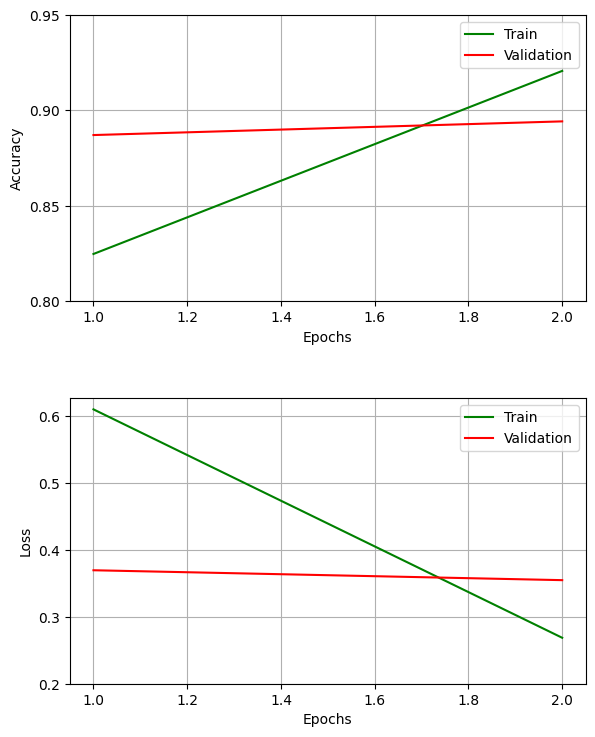

In [152]:
# Tunning The Model
#-------------------------------------------------------------------------------
dnn=DNN(cv_train.shape[1],y_train.shape[1])
tunner=kt.Hyperband(hypermodel=dnn,objective="val_accuracy",max_epochs=4,factor=3,overwrite=False)
tunner.search_space_summary()
tunner.search(cv_train,y_train,epochs=20,validation_data=(cv_test,y_test),callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)])
best_hps = tunner.get_best_hyperparameters(num_trials=1)[0]
model = tunner.hypermodel.build(best_hps)
history=model.fit(cv_train, y_train,batch_size=64,epochs=2,validation_data=(cv_test,y_test))
model.save(f"/content/drive/MyDrive/Science Survey/{areas[number]}/child_level_dnn.keras")
#-------------------------------------------------------------------------------



#Ploting
#------------------------------------------------------------------------------------------
epochs_number=len(history.history["accuracy"])+1
fig,axis=plt.subplots(2,1)

#Figure Accuracy
axis[0].plot(range(1,epochs_number),history.history["accuracy"],label="Train",color="green")
axis[0].plot(range(1,epochs_number),history.history["val_accuracy"],label="Validation",color="red")
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Accuracy')
axis[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axis[0].yaxis.set_ticks(np.arange(round(min(history.history["accuracy"])-0.05,1),round(max(history.history["accuracy"])+0.05,1),0.05))
#Figure Loss
axis[1].plot(range(1,epochs_number),history.history["loss"],label="Train",color="green")
axis[1].plot(range(1,epochs_number),history.history["val_loss"],label="Validation",color="red")
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Loss')
axis[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis[1].yaxis.set_ticks(np.arange(round(min(history.history["loss"])-0.1,1),round(max(history.history["loss"])+0.1,1),0.1))

axis[0].grid()
axis[1].grid()

axis[0].legend()
axis[1].legend()

fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(6)



plt.show()
fig.savefig(f"/content/drive/MyDrive/Science Survey/{areas[number]}/{areas[number]}_DNN_plot.jpg")
#------------------------------------------------------------------------------------------


#Saving Model and Accuracy and Loss
#------------------------------------------------------------------------------------------
accuracy_text=' '.join([str(number)for number in history.history["accuracy"]])
loss_text=','.join([str(number)for number in history.history["loss"]])
val_accuracy_text=' '.join([str(number)for number in history.history["val_accuracy"]])
val_loss_text=' '.join([str(number)for number in history.history["val_loss"]])
with open(f"/content/drive/MyDrive/Science Survey/{areas[number]}/child_level_dnn_.txt","w") as f:
  f.write("Accuracy Train:"+accuracy_text+"\n")
  f.write("Loss Train:"+loss_text+"\n")
  f.write("Accuracy Test:"+val_accuracy_text+"\n")
  f.write("Loss Test:"+val_loss_text+"\n")
index=history.history["accuracy"].index(max(history.history["accuracy"]))
Excel_Output=pd.concat([Excel_Output,pd.DataFrame([{"Classifier":"DNN","Embedding":"CountVectorize","Dimension_Size":cv_train.shape[1],"Train Accuracy":history.history["accuracy"][index],"Train Precision":history.history["precision"][index]," Train Recall":history.history["recall"][index],"Test Accuracy":history.history["val_accuracy"][index],"Test Precision":history.history["val_precision"][index]," Test Recall":history.history["val_recall"][index]}])])
Excel_Output.to_csv(f"/content/drive/MyDrive/Science Survey/{areas[number]}/{areas[number]}_DNN_OUTPU.csv")

del cv_train
del cv_test